In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pricedata.csv')

In [3]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,1/4/2000,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,1/5/2000,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,1/6/2000,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,1/7/2000,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,1/10/2000,23.04,23.78,23.04,23.73,26388,USD


In [4]:
df['Date'] = [dt.datetime.strptime(date_str, '%m/%d/%Y').date() for date_str in df['Date']]

In [5]:
df.set_index(df['Date'], inplace = True)
df.drop(columns = 'Date', inplace = True)

In [6]:
df['Symbol'].unique()

array(['Brent Oil', 'Crude Oil WTI', 'Natural Gas', 'Heating Oil'],
      dtype=object)

In [7]:
brent = df[df['Symbol'] == 'Brent Oil']
WTI = df[df['Symbol'] == 'Crude Oil WTI']
natural = df[df['Symbol'] == 'Natural Gas']
heating = df[df['Symbol'] == 'Heating Oil']

In [8]:
brent_market_hours = []
for day in brent.index:
    brent_market_hours.append(brent.loc[day, 'Close'] - brent.loc[day, 'Open'])
    
brent_market_hours = pd.Series(brent_market_hours, index = brent.index)


brent_after_hours = []
for day in range(len(brent.index[:-1])):
    brent_after_hours.append(brent.iloc[day + 1, 1] - brent.iloc[day, 4])
    
brent_after_hours = pd.Series(brent_after_hours, index = brent.index[:-1])

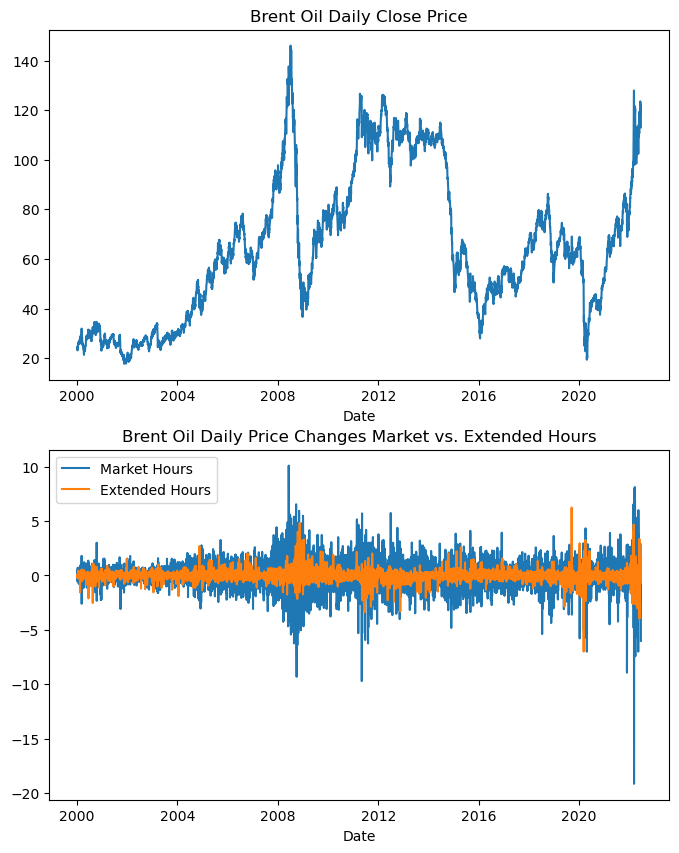

In [9]:
plt.figure(figsize = (8, 10))

plt.subplot(2, 1, 1)
brent['Close'].plot()
plt.title('Brent Oil Daily Close Price')

plt.subplot(2, 1, 2)
brent_market_hours.plot(label = "Market Hours")
brent_after_hours.plot(label = "Extended Hours")
plt.legend()
plt.title("Brent Oil Daily Price Changes Market vs. Extended Hours")

plt.show()

In [10]:
WTI_market_hours = []

for day in WTI.index:
    WTI_market_hours.append(WTI.loc[day, 'Close'] - WTI.loc[day, 'Open'])
    
WTI_market_hours = pd.Series(WTI_market_hours, index = WTI.index)

WTI_after_hours = []

for day in range(len(WTI.index[:-1])):
    WTI_after_hours.append(WTI.iloc[day + 1, 1] - WTI.iloc[day, 4])
    
WTI_after_hours = pd.Series(WTI_after_hours, index = WTI.index[:-1])

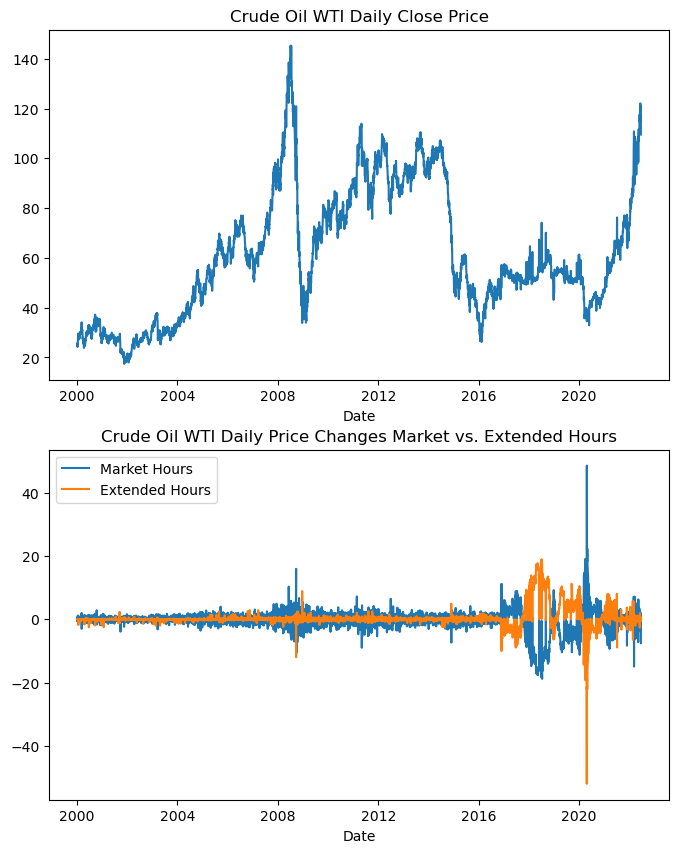

In [11]:
plt.figure(figsize = (8, 10))

plt.subplot(2, 1, 1)
WTI['Close'].plot()
plt.title('Crude Oil WTI Daily Close Price')

plt.subplot(2, 1, 2)
WTI_market_hours.plot(label = "Market Hours")
WTI_after_hours.plot(label = "Extended Hours")
plt.legend()
plt.title("Crude Oil WTI Daily Price Changes Market vs. Extended Hours")

plt.show()

In [12]:
natural_market_hours = []

for day in natural.index:
    natural_market_hours.append(natural.loc[day, 'Close'] - natural.loc[day, 'Open'])
    
natural_market_hours = pd.Series(natural_market_hours, index = natural.index)

natural_after_hours = []

for day in range(len(natural.index[:-1])):
    natural_after_hours.append(natural.iloc[day + 1, 1] - natural.iloc[day, 4])
    
natural_after_hours = pd.Series(natural_after_hours, index = natural.index[:-1])

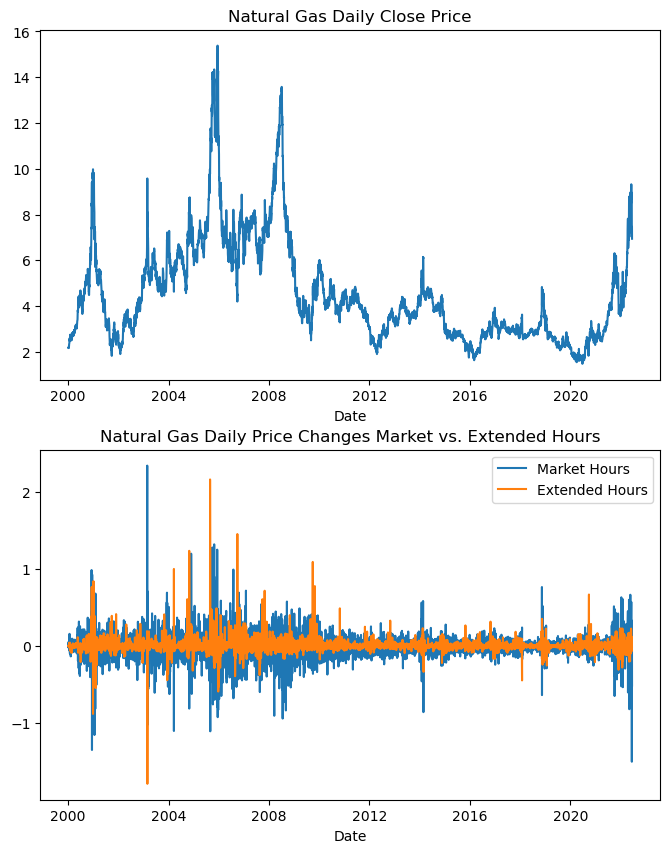

In [13]:
plt.figure(figsize = (8, 10))

plt.subplot(2, 1, 1)
natural['Close'].plot()
plt.title('Natural Gas Daily Close Price')

plt.subplot(2, 1, 2)
natural_market_hours.plot(label = "Market Hours")
natural_after_hours.plot(label = "Extended Hours")
plt.legend()
plt.title("Natural Gas Daily Price Changes Market vs. Extended Hours")

plt.show()

In [14]:
heating_market_hours = []

for day in heating.index:
    heating_market_hours.append(heating.loc[day, 'Close'] - heating.loc[day, 'Open'])
    
heating_market_hours = pd.Series(heating_market_hours, index = heating.index)

heating_after_hours = []

for day in range(len(heating.index[:-1])):
    heating_after_hours.append(heating.iloc[day + 1, 1] - heating.iloc[day, 4])
    
heating_after_hours = pd.Series(heating_after_hours, index = heating.index[:-1])

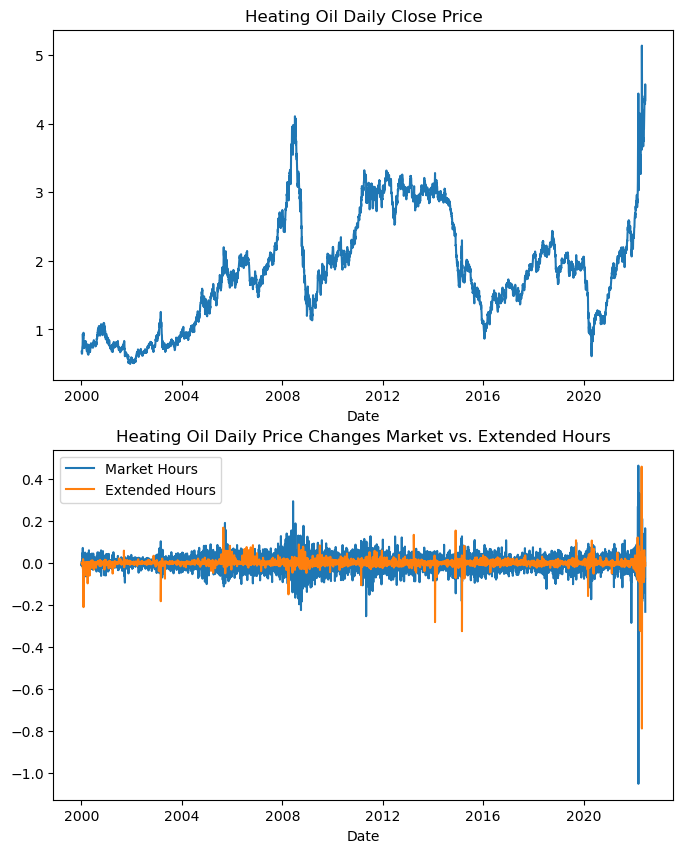

In [15]:
plt.figure(figsize = (8, 10))

plt.subplot(2, 1, 1)
heating['Close'].plot()
plt.title('Heating Oil Daily Close Price')

plt.subplot(2, 1, 2)
heating_market_hours.plot(label = "Market Hours")
heating_after_hours.plot(label = "Extended Hours")
plt.legend()
plt.title("Heating Oil Daily Price Changes Market vs. Extended Hours")

plt.show()

In [16]:
print(f"Heating Oil Initial Price: {round(heating['Open'][0], 2)}")
print(f"Heating Oil Final Price: {round(heating['Close'][-1], 2)}")
print(f"Market Hours Total Change: {round(heating_market_hours.sum(), 2)}")
print(f"Extended Hours Total Change: {round(heating_after_hours.sum(), 2)}")

Heating Oil Initial Price: 0.67
Heating Oil Final Price: 4.34
Market Hours Total Change: -0.29
Extended Hours Total Change: 3.96


In [17]:
print(f"Brent Oil Initial Price: {round(brent['Open'][0], 2)}")
print(f"Brent Oil Final Price: {round(brent['Close'][-1], 2)}")
print(f"Market Hours Total Change: {round(brent_market_hours.sum(), 2)}")
print(f"Extended Hours Total Change: {round(brent_after_hours.sum(), 2)}")

Brent Oil Initial Price: 23.9
Brent Oil Final Price: 113.12
Market Hours Total Change: 43.08
Extended Hours Total Change: 46.14


In [18]:
print(f"Natural Gas Initial Price: {round(natural['Open'][0], 2)}")
print(f"Natural Gas Final Price: {round(natural['Close'][-1], 2)}")
print(f"Market Hours Total Change: {round(natural_market_hours.sum(), 2)}")
print(f"Extended Hours Total Change: {round(natural_after_hours.sum(), 2)}")

Natural Gas Initial Price: 2.13
Natural Gas Final Price: 6.94
Market Hours Total Change: -33.48
Extended Hours Total Change: 38.29


In [19]:
print(f"Crude Oil WTI Initial Price: {round(WTI['Open'][0], 2)}")
print(f"Crude Oil WTI Final Price: {round(WTI['Close'][-1], 2)}")
print(f"Market Hours Total Change: {round(WTI_market_hours.sum(), 2)}")
print(f"Extended Hours Total Change: {round(WTI_after_hours.sum(), 2)}")

Crude Oil WTI Initial Price: 25.2
Crude Oil WTI Final Price: 109.56
Market Hours Total Change: -2434.25
Extended Hours Total Change: 2518.61


Why might this be? Investopedia explains some of the key differences. Also, the market is not open on weekends, so a lot can happen over that span that can affect prices. One important thing that we have noted affects prices is politics/important news announcements. We are more likely to receive these during after hours (such as in the morning news, evening news, or over the weekends).

Another interesting result from the graph above is that the Crude OIL WTI price changes during opening and closing hours opposed each other nearly every day between the years 2017 and 2020. Whenever the price increased during market hours, it decreased by approximately the same amount during after hours. Similarly, when the price decreased during market hours, it increased by about the same amount during after hours. Interestingly, the price overall remained relatively stable during this time period.

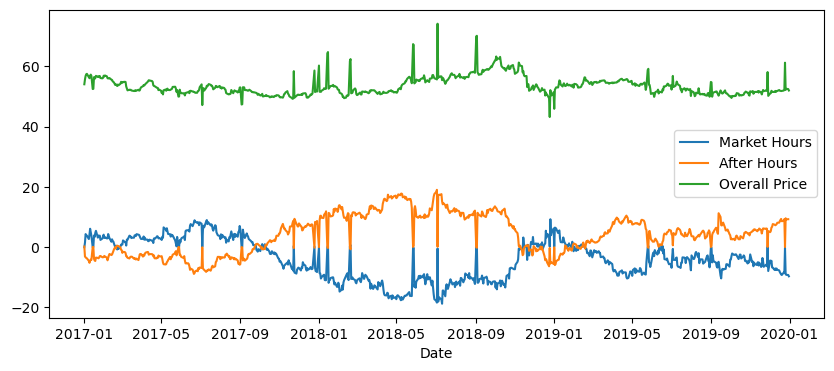

In [63]:
plt.figure(figsize = (10, 4))
WTI_market_hours.iloc[4304:-649].plot(label = 'Market Hours Change')
WTI_after_hours.iloc[4304:-649].plot(label = 'After Hours Change')
WTI.iloc[4304:-649]['Close'].plot(label = 'Overall Price')
plt.legend()
plt.show()